# NaCl离子晶体晶格能的研究
+ date: 2013-08-09
+ slug: nacl-madelung-constant
+ tags: cython, python

> 这是我的大一化学原理小论文

离子晶体晶格能，主要成分为静电势能，计算出每个离子的电势能后就可以估算出其晶格能。由于晶体结构是无限延伸的,所以必然要求一些无穷级数的和。这个级数难以求出精确值。由实际意义知其必然收敛,因此可以用计算机进行相应计算。对于NaCl晶体,设相邻异性离子产生的电势能为$E_0$，$E_1$是某个离子和其他离子作用的电势能。定义Madelung常数$k=E_1/E_0$。编写C语言程序计算出$$k=1.74756459463, \quad E_1=kE_0=-8.95\rm{eV}$$

设晶体有$2N$个离子，则总能量为$NE_1$

```c
#include <stdio.h>
#include <math.h>
#define N 1000//计算的层数
int main(){
    double a=0.,b=0.,c=0.,s=0.,t=0.;
    int m, i, j;
    for(m=1; m<N+1; m++){
        a=(1-(m%2)*2)/(double)m;//*6 面
        b=(1-(m%2)*2)/sqrt(3*m*m);//*8 点
        c=1/sqrt(2*m*m);//*12 边
        for(i=1;i<m;i++){
            for(j=0;j<m;j++){
                a+=4*(1-((m+i+j)%2)*2)/sqrt(m*m+i*i+j*j);//*24
            }
            c+=2*(1-(i%2)*2)/sqrt(2*m*m+i*i);
        }
        t=a*6+b*8+c*12;
        if (m%10 == 0){
            printf("t[%4d]=%9lf\t\ts=%.15lf\t\ts2=%lf\n",m,t,s+a*3+b+c*3,s+t);
        }
        s+=t;
    }
    s=s-t+a*3+b+c*3;
    printf("s[%4d]=%.15lf\n", N, s);
    return 0;
}
```

## Cython重写
+ date: 2017-05-05

In [1]:
#ignore
%load_ext Cython

/usr/lib64/python3.6/site-packages/Cython/Distutils/old_build_ext.py:30: UserWarning: Cython.Distutils.old_build_ext does not properly handle dependencies and is deprecated.
  "Cython.Distutils.old_build_ext does not properly handle dependencies "


In [2]:
%%cython
cimport cython
from libc.math cimport sqrt

@cython.cdivision(True)
cpdef double madelung(int N):
    cdef double face, vertex, edge, E = 0.
    cdef int m, i, j
    for m in range(1, N + 1):
        vertex = (1 - (m % 2) * 2) / sqrt(3 * m * m)
        edge = 1 / sqrt(2 * m * m)
        face = (1 - (m % 2) * 2) / <double > m
        for i in range(1, m):
            for j in range(m):
                face += 4 * (1 - ((m + i + j) % 2) * 2) / \
                    sqrt(m * m + i * i + j * j)
            edge += 2 * (1 - (i % 2) * 2) / sqrt(2 * m * m + i * i)
        E += face * 6 + vertex * 8 + edge * 12
    E -= face * 3 + 7 * vertex + 9 * edge
    return E

In [3]:
E=array([madelung(2**i) for i in range(10)])
y=log2(abs(diff(E)))

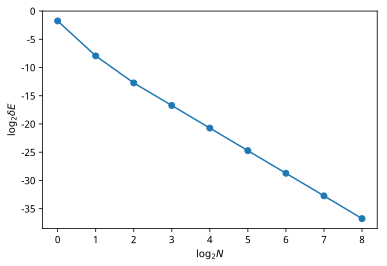

In [4]:
plot(y, 'o-')
xlabel(r"$\log_2 N$")
ylabel(r"$\log_2 \delta E$");

In [5]:
E[-1]

-1.7475645946340816